## GSoC 2020 Student Application Test
#### CERN Project: Quantum Machine Learning for High Energy Physic


You will explore how best to apply machine learning algorithms, for example, Neural Network, Boosted Decision Tree (BDT), Support Vector Machine(SVM) to solve a High Energy Data analysis issue, more specifically,  separating the signal events from the background events.

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format. In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background sample are labeled with 0.

You can apply one machine learning algorithm to this input but be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).

#### Loading data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = np.load('QIS_EXAM_200Events.npz', allow_pickle=True)

train_dataset = file['training_input'].item()
test_dataset = file['test_input'].item()

#### Data investigation

In [2]:
df_train_0 = pd.DataFrame(train_dataset['0'])
df_test_0  = pd.DataFrame(test_dataset['0'])

df_train_0.describe()

,0,1,2,3,4
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.454617,-0.103901,-0.224488,-0.796956,-0.576463
std,0.605700,0.902026,0.652320,0.122736,0.054428
min,-0.999915,-0.999931,-0.933175,-0.929184,-0.730352
25%,-0.998979,-0.999337,-0.924206,-0.865289,-0.597834
50%,-0.431735,-0.193156,0.076867,-0.826015,-0.582649
75%,-0.426285,0.864718,0.077533,-0.775574,-0.541973
max,0.919312,0.880835,0.934484,-0.246957,-0.401706


In [3]:
df_train_1 = pd.DataFrame(train_dataset['1'])
df_test_1  = pd.DataFrame(test_dataset['1'])

df_train_1.describe()

,0,1,2,3,4
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.330350,-0.201806,-0.156798,-0.675110,-0.540111
std,0.646656,0.825911,0.760558,0.227266,0.123972
min,-0.999097,-0.999338,-0.936612,-0.912692,-0.844211
25%,-0.232165,-0.950013,-0.673098,-0.808118,-0.608291
50%,0.351122,-0.911842,-0.661179,-0.723618,-0.550558
75%,0.889373,0.579163,0.918008,-0.617599,-0.507115
max,0.933783,0.886309,0.932132,0.155652,-0.169384


In [0]:
df_train = df_train_0.append(df_train_1)
df_test  = df_test_0.append(df_test_1)

We can look at data distribution of each single component to see if the classes are easily separable.

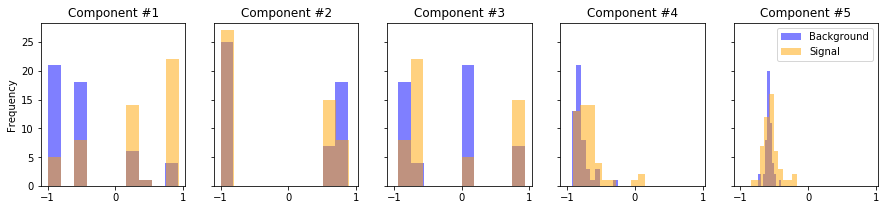

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharex=True, sharey=True)

for i in np.arange(0, 5):
    df_train_0[i].plot.hist(alpha=0.5, ax=axes[i], color='blue', label='Background')
    df_train_1[i].plot.hist(alpha=0.5, ax=axes[i], color='orange', label='Signal')
    axes[i].set_title("Component #" + str(i + 1))

plt.legend()

Since data is 5D, it is not easily plottable, but we can plot each component against each other.

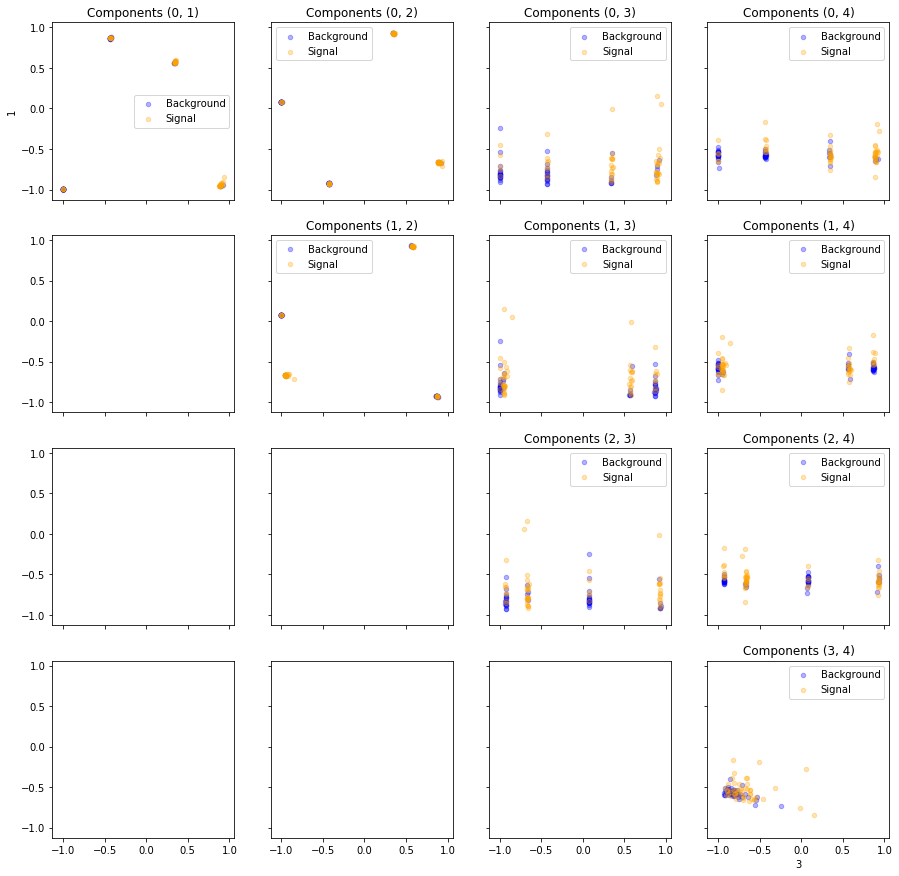

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True)

all_unique_tupes = [(i, j) for i in range(0, 5) for j in range(i+1, 5)]
for i, j in all_unique_tupes:
        df_train_0.plot.scatter(x=i, y=j, alpha=0.3, ax=axes[i, j-1], c='blue', label='Background') 
        df_train_1.plot.scatter(x=i, y=j, alpha=0.3, ax=axes[i, j-1], c='orange', label='Signal')
        axes[i, j-1].set_title("Components " + str((i, j)))

plt.legend()

#### Data preprocessing 

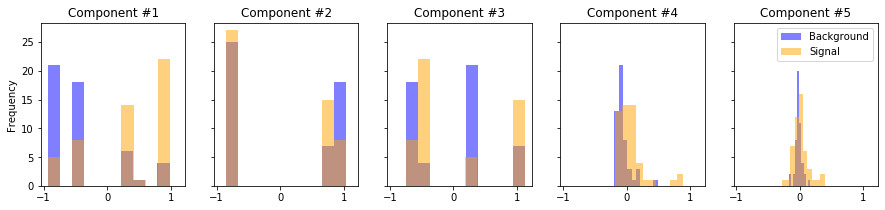

In [11]:
# Zero meaning the data
df_train_0 -= df_train.mean()
df_train_1 -= df_train.mean()

df_test_0 -= df_test.mean()
df_test_1 -= df_test.mean()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharex=True, sharey=True)

for i in np.arange(0, 5):
    df_train_0[i].plot.hist(alpha=0.5, ax=axes[i], color='blue', label='Background')
    df_train_1[i].plot.hist(alpha=0.5, ax=axes[i], color='orange', label='Signal')
    axes[i].set_title("Component #" + str(i + 1))

plt.legend()

Preparing the data

In [0]:
from sklearn.utils import shuffle

X_train = np.append(df_train_0.values, df_train_1.values, axis=0)
y_train = np.array([[0] * len(df_train_0), [1] * len(df_train_1)]).reshape(1,-1)[0]

X_test = np.append(df_test_0.values, df_test_1.values, axis=0)
y_test = np.array([[0] * len(df_test_0), [1] * len(df_train_1)]).reshape(1,-1)[0]

X_train, y_train = shuffle(X_train, y_train)
X_test,  y_test  = shuffle(X_test,  y_test)

#### SVMs

In [21]:
from sklearn import svm
from sklearn.metrics import classification_report

clf_svm = svm.SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}".format(clf_svm.score(X_test, y_test)))
print("SVM support vector amount: {}".format(clf_svm.n_support_))

y_pred = clf_svm.predict(X_test)
print("SVM report: \n {}".format(classification_report(y_test, y_pred)))

SVM accuracy on the test data: 0.71
SVM support vector amount: [29 30]
SVM report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74        50
           1       0.77      0.60      0.67        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



Softening the margin with lower C as we have a lot of overlapping data

In [22]:
clf_svm = svm.SVC(C = 1e-1, gamma='auto')
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}".format(clf_svm.score(X_test, y_test)))
print("SVM support vector amount: {}".format(clf_svm.n_support_))

SVM accuracy on the test data: 0.71
SVM support vector amount: [50 50]


As can be seen in the plots above, data seems to cluster in 4 different clusters. We can train separate SVMs for each clusters. 

In [24]:
from sklearn.cluster import KMeans

cluster_amount = 4

kmeans = KMeans(n_clusters = cluster_amount)
clusters_train = kmeans.fit_predict(X_train)
clusters_test = kmeans.predict(X_test)

score_all = 0
for i in range(0, cluster_amount):
    clf_svm = svm.SVC(gamma='auto')
    clf_svm.fit(X_train[clusters_train == i], y_train[clusters_train == i])
    score = clf_svm.score(X_test[clusters_test == i], y_test[clusters_test == i])
    print("SVM accuracy for class {}: {}".format(i, score))
    
    score_all += score
print("--------------------------")
print("Overall average classification accuracy: {}".format(score_all / cluster_amount))

SVM accuracy for class 0: 0.5588235294117647
SVM accuracy for class 1: 0.8148148148148148
SVM accuracy for class 2: 0.75
SVM accuracy for class 3: 0.7894736842105263
--------------------------
Overall average classification accuracy: 0.7282780071092765


Since one of the clusters have low accuracy, we can try mergening it with its neighbor to see if we can improve the model.

In [25]:
cluster_amount = 3

kmeans = KMeans(n_clusters = cluster_amount)
clusters_train = kmeans.fit_predict(X_train)
clusters_test = kmeans.predict(X_test)

score_all = 0
for i in range(0, cluster_amount):
    clf_svm = svm.SVC(gamma='auto')
    clf_svm.fit(X_train[clusters_train == i], y_train[clusters_train == i])
    score = clf_svm.score(X_test[clusters_test == i], y_test[clusters_test == i])
    print("SVM accuracy for class {}: {}".format(i, score))
    
    score_all += score
print("--------------------------")
print("Overall average classification accuracy: {}".format(score_all / cluster_amount))

SVM accuracy for class 0: 0.6415094339622641
SVM accuracy for class 1: 0.8148148148148148
SVM accuracy for class 2: 0.75
--------------------------
Overall average classification accuracy: 0.7354414162590263


#### Random forests

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 50, 
                                max_depth = None, 
                                min_samples_split = 3)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print("Cross validation mean accuracy: {}".format(scores.mean()))

clf_rf.fit(X_train, y_train)
score = clf_rf.score(X_test, y_test)
print("Random Forest accuracy on the test data: {}".format(score))

Cross validation mean accuracy: 0.73
Random Forest accuracy on the test data: 0.64


#### Ensemble learning

We can boost the random forest classifier to see its effect on performance.

In [36]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(clf_rf)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Cross validation mean accuracy: {}".format(scores.mean()))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Boosted Random Forest accuracy on the test data: {}".format(score))

Cross validation mean accuracy: 0.7700000000000001
Boosted Random Forest accuracy on the test data: 0.65


We can combine two weak classifiers together to get a stronger classifer

In [37]:
from sklearn.ensemble import VotingClassifier

clf_svm = svm.SVC(gamma='auto', probability=True)
clf_rf = RandomForestClassifier(n_estimators = 200, 
                                max_depth = None, 
                                min_samples_split = 3)
clf = VotingClassifier(estimators=[
                                   ('svm', clf_svm), 
                                   ('rf',  clf_rf)
                                   ], voting='soft')
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Cross validation mean accuracy: {}".format(scores.mean()))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Boosted Random Forest accuracy on the test data: {}".format(score))

Cross validation mean accuracy: 0.76
Boosted Random Forest accuracy on the test data: 0.71


#### Artificial Neural Networks

In [39]:
import tensorflow as tf
import keras

# Stochastic hyperparameter search
count = 20
max_score = 0

while (count > 0):
  count = count - 1

  neurons_1 = np.random.choice(np.arange(3, 8))
  neurons_2 = np.random.choice(np.arange(6, 11))
  neurons_3 = np.random.choice(np.arange(3, 8))

  dropout_1 = np.random.choice(np.arange(2, 7) / 10)
  dropout_2 = np.random.choice(np.arange(2, 7) / 10)

  init = np.random.choice(['random_uniform', 'random_normal'])
  batch = np.random.choice(np.arange(5, 25, 5))

  layer_common_params = {
    'activation' : 'relu', 
    'kernel_regularizer' : keras.regularizers.l2(0.01), 
    'kernel_initializer' : init
  }
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2 ** neurons_1, input_dim = 5, **layer_common_params),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2 ** neurons_2, **layer_common_params),
    tf.keras.layers.Dropout(dropout_1),
    tf.keras.layers.Dense(2 ** neurons_3, **layer_common_params),
    tf.keras.layers.Dropout(dropout_2),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=20, batch_size=batch, verbose=0)

  score = model.evaluate(X_test, y_test, verbose=0)[1]
  print("Score: {} \n Neurons {}, dropouts {}, inits {}, batch {}".format(
      score,
      [neurons_1, neurons_2, neurons_3], 
      [dropout_1, dropout_2], 
      init,
      batch))
  
  if score > max_score:
    max_score = score
    model.save('my_model')

Score: 0.6800000071525574 
 Neurons [5, 7, 5], dropouts [0.5, 0.2], inits random_normal, batch 5
Score: 0.6600000262260437 
 Neurons [6, 10, 5], dropouts [0.4, 0.3], inits random_uniform, batch 10
Score: 0.75 
 Neurons [3, 10, 3], dropouts [0.4, 0.6], inits random_normal, batch 20
Score: 0.7200000286102295 
 Neurons [4, 6, 7], dropouts [0.4, 0.6], inits random_normal, batch 10
Score: 0.699999988079071 
 Neurons [5, 10, 4], dropouts [0.6, 0.6], inits random_uniform, batch 10
Score: 0.7099999785423279 
 Neurons [5, 6, 5], dropouts [0.6, 0.5], inits random_normal, batch 5
Score: 0.6600000262260437 
 Neurons [5, 8, 3], dropouts [0.2, 0.4], inits random_uniform, batch 5
Score: 0.699999988079071 
 Neurons [7, 10, 4], dropouts [0.2, 0.2], inits random_normal, batch 20
Score: 0.6800000071525574 
 Neurons [7, 7, 3], dropouts [0.4, 0.2], inits random_uniform, batch 15
Score: 0.699999988079071 
 Neurons [4, 8, 3], dropouts [0.4, 0.6], inits random_normal, batch 10
Score: 0.699999988079071 
 Neuro

In [41]:
model_loaded = tf.keras.models.load_model('my_model')

score = model_loaded.evaluate(X_test, y_test, verbose=0)[1]
print("Multi Layer Perceptron accuracy on the test data: {}".format(score))

Multi Layer Perceptron accuracy on the test data: 0.75


As expected, since machine learning algorithms are data hungry, without a sufficient amount of training data convergence is not guaranteed and results / accuracy can very drastically. 